# **Regression**
Imagine that you work for SL, and that one of your customers' biggest complaints is that they don't know what's the arrival delay for their buses. You decide to do something about it by building a model to predict the arrival delay at one bus stop. You intend to use the massive amounts of delay data the company has collected over the years to build a machine-learning model.

Regression models predict numeric outcomes such as the price of a car, the age of a person, or the delay at a bus stop. Let's use a portion of a larger bus-delay dataset from Stockholm to train a regression model to predict the arrival delay given the dwell time, scheduled travel time, upstream stop delay, and recurrent delay.

# **Tutorial 1: The development process of an AI model (linear regression)**
In tutorial 1, we will give an example of a simple linear regression model to illustrate the process of developing an AI model which includes data exploration​, feature engineering, linear regression model specification​, model training​, and cross-validation.​



## Load and prepare the data
Start by loading the dataset and shaping it so that it's suitable for use in machine learning. This dataset is a subset of a much larger dataset. The data requires an amount of prep work before it's of any use at all. We here use a url link to load the data. If you cannot load the data via URL link, please download the data from GitHub and upload the data to colab manually.

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BusData.csv'
df = pd.read_csv(url)

# df = pd.read_csv('Exercise2BusData.csv')
df.head(10)

,Arrival_time,Stop_id,Bus_id,Line_id,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,01/05/2022 07:03,10033,41355,1,-23,0,39,-4,28.641509
1,01/05/2022 07:21,10033,41356,1,168,0,39,181,27.880597
2,01/05/2022 07:37,10033,44400,1,231,0,39,244,27.852941
3,01/05/2022 07:50,10033,44399,1,150,17,39,143,27.826087
4,01/05/2022 19:29,10033,44060,1,965,35,51,947,42.029412
5,01/05/2022 19:58,10033,41351,1,33,19,46,30,38.970588
6,01/05/2022 20:14,10033,44399,1,75,26,46,63,38.840580
7,01/05/2022 20:28,10033,41356,1,58,15,46,52,34.059701
8,01/05/2022 20:57,10033,44060,1,904,35,46,888,34.102941
9,01/05/2022 21:00,10033,41357,1,141,12,46,140,34.000000


How many rows and columns does the dataset contain?

In [2]:
df.shape

(2179, 9)

Are any of the columns missing values?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Arrival_time           2179 non-null   object 
 1   Stop_id                2179 non-null   int64  
 2   Bus_id                 2179 non-null   int64  
 3   Line_id                2179 non-null   int64  
 4   Arrival_delay          2179 non-null   int64  
 5   Dwell_time             2179 non-null   int64  
 6   Scheduled_travel_time  2179 non-null   int64  
 7   Upstream_stop_delay    2179 non-null   int64  
 8   Recurrent_delay        2179 non-null   float64
dtypes: float64(1), int64(7), object(1)
memory usage: 153.3+ KB


For simplicity, we only use 1000 records here. If your computer cannot run this tutorial in a short time, please set a smaller number in the following code. For example, 800.

In [ ]:
df = df.iloc[:1000]

Remove columns that are no longer needed.

In [4]:
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

Draw a histogram by using seaborn to show the distribution of arrival delay.

<Axes: xlabel='Arrival_delay', ylabel='Count'>

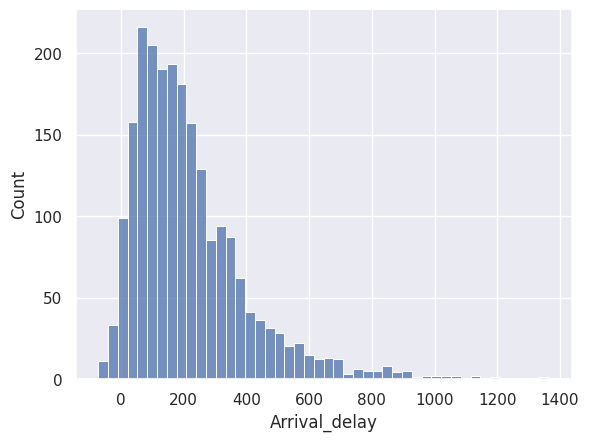

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.histplot(x=df['Arrival_delay'])

Find out how much influence input variables such as "Upstream_stop_delay" and "Dwell_time" have on the values in the "Arrival_delay" column.

In [6]:
corr_matrix = df.corr()
corr_matrix['Arrival_delay'].sort_values(ascending=False)

,Arrival_delay
Arrival_delay,1.000000
Upstream_stop_delay,0.993935
Dwell_time,0.218745
Recurrent_delay,0.162692
Scheduled_travel_time,0.100695


Feature engineering visually explore and understand the relationships between different features (variables) in a dataset. Seaborn pair plots help identify patterns, correlations, and potential outliers, aiding in the selection and transformation of features to improve model performance. It is a crucial step in data preprocessing to enhance the accuracy and effectiveness of machine learning models.​

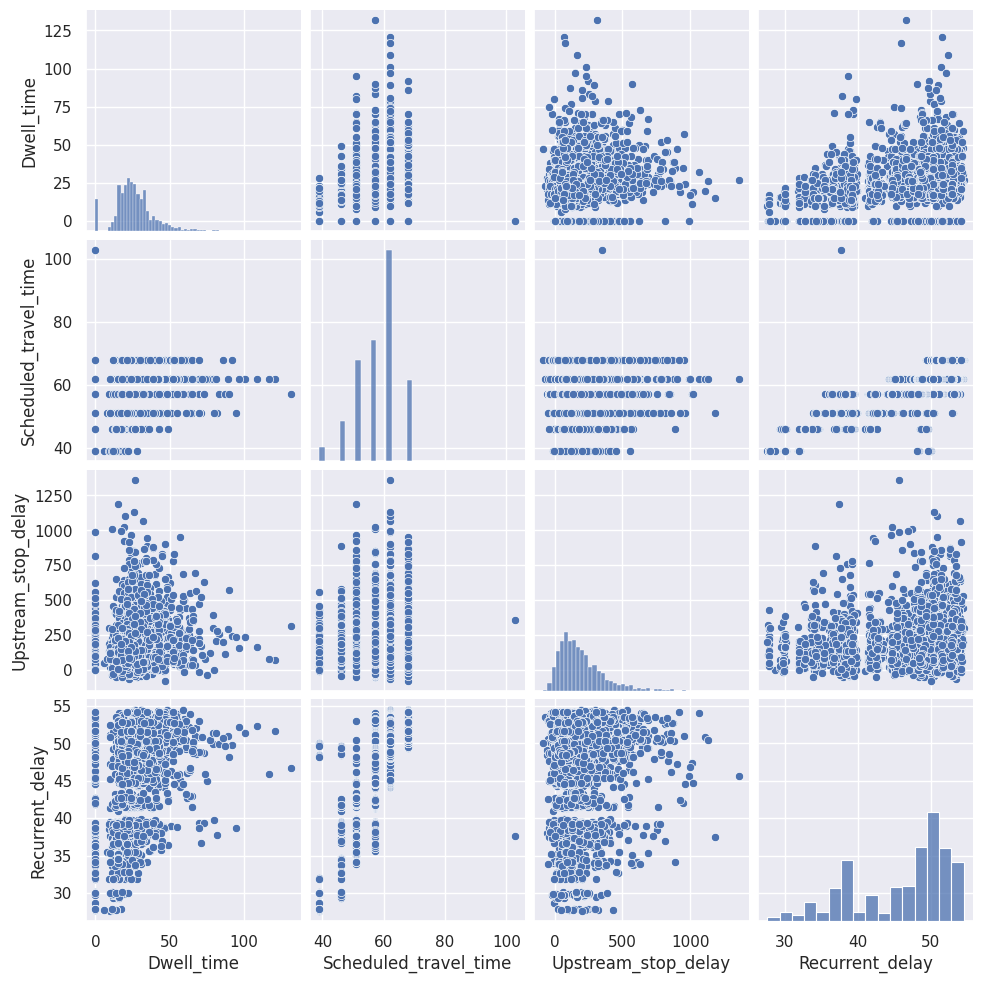

In [7]:
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']

sns.pairplot(x)

## Train / Test Split

Before modeling we need to split our data into a training and test set. The training set is used to train the model and the test set to evaluate its performance.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Create a linear regression model
Now it's time build a regression model and train it with the data prepared in the previous exercise.

In [9]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the test data with the fitted model
y_pred = model.predict(X_test)

## Evaluate the model
You can evaluate the model's performance using various metrics, such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or R-squared (R2).

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 9.654193995146553
Mean Squared Error: 176.3735387676195
R-squared: 0.9940853862137997


## Visualize the Results
we create a "Actual vs. Predicted Values" graph to give a visual inspection of the prediction quality.

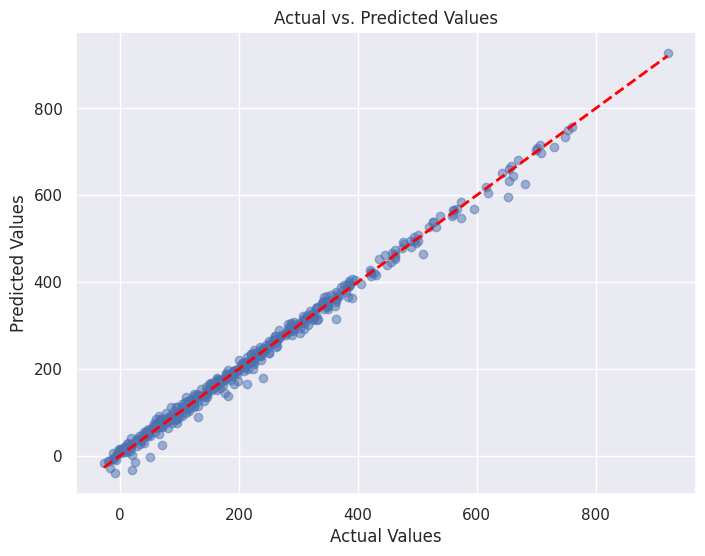

In [11]:
import matplotlib.pyplot as plt

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

# **Tutorial 2: AI model training techniques (SVM)**
We will give a SVM model to illustrate how to use training techniques including train-test split, normalization, and grid search to find the best hyperparameters for the model.

## Train-test split
The purpose of a "train-test split" is to evaluate the performance of a machine learning model. It involves dividing a dataset into two subsets: the training set, used to train the model, and the test set, used to assess how well the model generalizes to new, unseen data. This process helps identify if the model is overfitting (performing well on the training data but poorly on new data) or underfitting (performing poorly on both training and test data), allowing for adjustments to improve model accuracy and generalization.

We have already split the data in Tutorial 1. Therefore, we just put the code here and comment it out to just remind you of the importance of train-test split in modeling training.

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Normalization
Normalization is essential, especially when using SVMs, as it's sensitive to the scale of features. We can use StandardScaler from scikit-learn to normalize the data. It transforms the data so that each feature has a mean of 0 and a standard deviation of 1, which can be important for certain algorithms that are sensitive to the scale of input features, like gradient descent-based optimization methods. Other scalers include Min-Max scaling ("MinMaxScaler"), which scales features to a specific range (typically [0, 1]), and Robust scaling ("RobustScaler"), which is less affected by outliers in the data compared to StandardScaler. These scalers are used to preprocess data and make it more suitable for machine learning algorithms.

It is important to fit the scaler on the training data only and afterwards apply the fitted scaler to the test data. When fitting the scaler on both the train and test data there might be unwanted information leackage.

In [12]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Grid search
Hyperparameter tuning helps find the best set of hyperparameters for your model. We'll use GridSearchCV from scikit-learn to search for the best combination of parameters. Grid search is a hyperparameter tuning technique in machine learning used to systematically search through a predefined set of hyperparameter combinations for a given model to identify the best-performing configuration. It automates the process of selecting the optimal hyperparameters, helping improve the model's performance and generalization on unseen data by finding the best parameter values that minimize errors or maximize a chosen performance metric.

The GridSearchCV applies for each parameter set a cross validation (in this case five splits). By executing this cross validation we can increase the robustness of the results.

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=2)

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best Parameters:", best_params)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.1s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.1s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.1s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.1s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.1s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.1s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.1s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.1s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.1s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.1s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=   0.1s
[CV] END ....................C=0.1, epsilon=0.0

In [15]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# define XGBoost grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=5, verbose=2)

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("best parameters:", best_params)
print("best score:", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END 

## Train a SVM regression model
Now, create an SVM regression model using the best parameters and train it using the training data.

In [ ]:
# Create an SVR model with the best parameters from the grid search
best_svr = SVR(kernel=best_params['kernel'], C=best_params['C'], epsilon=best_params['epsilon'])
best_svr.fit(X_train, y_train)


SVR(C=10, epsilon=10, kernel='linear')

In [16]:
from xgboost import XGBRegressor

# use the best parameter to create XGBoost model
best_xgb = XGBRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree']
)

best_xgb.fit(X_train_scaled, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Make predictions
Use the trained model to make predictions on the test data and evaluate the performance of the SVM regression model using metrics like Mean Squared Error (MSE) and R-squared.

In [ ]:
y_pred = best_svr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 9.029471488864578
Mean Squared Error: 167.1210201664315
R-squared: 0.993278787107813


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_xgb.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 10.736172484148533
Mean Squared Error: 214.28487345028526
R-squared: 0.9928140452613297


## Let's see the predictions
we create a "Actual vs. Predicted Values" graph again to give a visual inspection of the prediction quality.

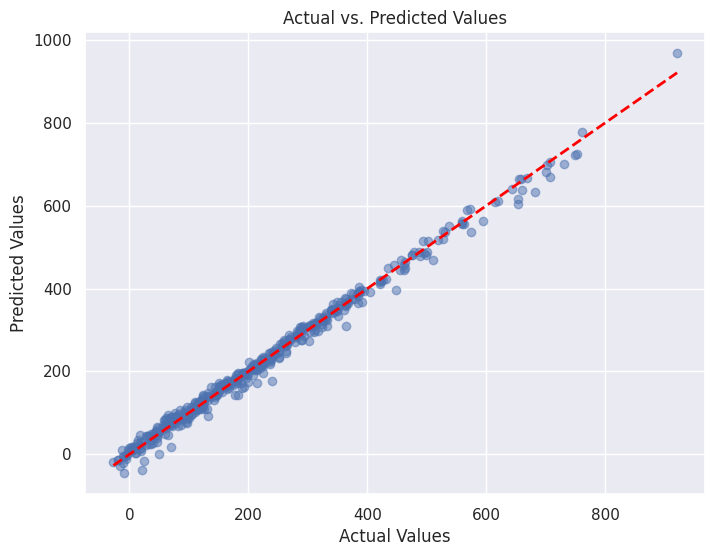

In [18]:
# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()